In [1]:
# Import libraries
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random
import json
from typing import Union
import numpy as np
from disagreement import Disagreement

In [3]:
! ls /storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/model_outputs/artifacts/random_forest_t_300_md_10/

random_forest_t_300_md_10_fold_1_2016-01-07.pkl
random_forest_t_300_md_10_fold_2_2015-09-09.pkl
random_forest_t_300_md_10_fold_3_2015-05-12.pkl
random_forest_t_300_md_10_fold_4_2015-01-12.pkl
random_forest_t_300_md_10_fold_5_2014-09-14.pkl
random_forest_t_300_md_10_fold_6_2014-05-17.pkl
test_prediction_fold_1_2016-01-07.csv
test_prediction_fold_2_2015-09-09.csv
test_prediction_fold_3_2015-05-12.csv
test_prediction_fold_4_2015-01-12.csv
test_prediction_fold_5_2014-09-14.csv
test_prediction_fold_6_2014-05-17.csv


In [69]:
main_path = "/storage/scratch/e17-fyp-xai/projects/e17-4yp-using-machine-learning-in-high-stake-settings/code/"
images_save_path = "Images_XAI_Fold_5_2014-09-14/RF"
save_name = "RF Model for Fold 5"
model_path = main_path + "model_outputs/artifacts/random_forest_t_300_md_10/" + "random_forest_t_300_md_10_fold_5_2014-09-14.pkl"

In [53]:
# Function to save images
def save_image(caption, path):
    set_path = f'{path}/{caption}.png'
    plt.savefig(set_path, bbox_inches='tight')

In [13]:
# Function to load the pickle file and return the feature importances
def load_model_and_feat(pkl_model_path, model_name):
  # Load the model
  #model = pickle.load(open(pkl_model_path, 'rb'))
  with open(pkl_model_path, "rb") as file_handle:
    model = pickle.load(file_handle)

  if model_name == 'logreg':
    # Load the feature importance array
    importance = model.coef_[0]
  else:
    importance = model.feature_importances_
  # Get the feature names
  feat_names = model.feature_names_in_

  return importance, feat_names


# Function to sort features and output
def sort_features(importance, feat_names):
    # Create df and sort
    df = pd.DataFrame({"Feature": feat_names, "Importance": importance})
    #df_sorted = df.sort_values("Importance", ascending=False)
    df_sorted = df.reindex(df.Importance.abs().sort_values(ascending=False).index)
    return df_sorted

In [70]:
# Load model
global_importance, feat_names = load_model_and_feat(model_path, "rf")
print(global_importance, feat_names)
global_explanation_feat = sort_features(global_importance, feat_names)
global_explanation_feat.values

[3.04073729e-02 3.20975909e-01 1.33777110e-02 9.76580095e-03
 3.40022750e-02 7.10094282e-03 3.74175338e-02 2.15418830e-03
 4.89988171e-02 1.15809336e-02 4.40949288e-02 4.53632316e-04
 2.26503275e-02 2.38131457e-02 2.03672791e-05 3.07634857e-02
 4.93721152e-04 9.54058476e-05 1.82959283e-04 3.38798067e-04
 2.28678382e-04 2.88587962e-04 4.37558963e-04 0.00000000e+00
 4.38577679e-04 3.31047718e-05 5.43569449e-06 7.55651297e-05
 6.21659063e-05 1.28842275e-04 1.50864938e-04 0.00000000e+00
 4.02091408e-04 3.69005023e-05 1.03271284e-05 4.16264016e-04
 1.81334478e-04 2.11345982e-04 2.05548075e-04 0.00000000e+00
 3.13013981e-03 3.33651069e-04 3.30043056e-05 1.90530876e-04
 8.90478573e-03 4.08992577e-04 4.50958614e-04 0.00000000e+00
 1.38494643e-03 3.02920941e-04 1.39161534e-04 1.85100609e-04
 3.36354758e-04 3.61898554e-04 4.22043552e-04 0.00000000e+00
 2.40145495e-03 4.57738839e-05 6.96773701e-07 2.20506012e-05
 1.04155731e-04 0.00000000e+00 2.77758081e-04 4.44575097e-06
 1.27759954e-04 0.000000

array([['Project Cost', 0.3209759087579579],
       ['Project Resource Category_Technology', 0.10276057075706128],
       ['School Success Rate', 0.048998817075993774],
       ...,
       ['Project Subject Subcategory Tree_Gym & Fitness, Warmth, Care & Hunger',
        0.0],
       ['Project Subject Subcategory Tree_Other, Warmth, Care & Hunger',
        0.0],
       ['Project Subject Subcategory Tree_ESL, Gym & Fitness', 0.0]],
      dtype=object)

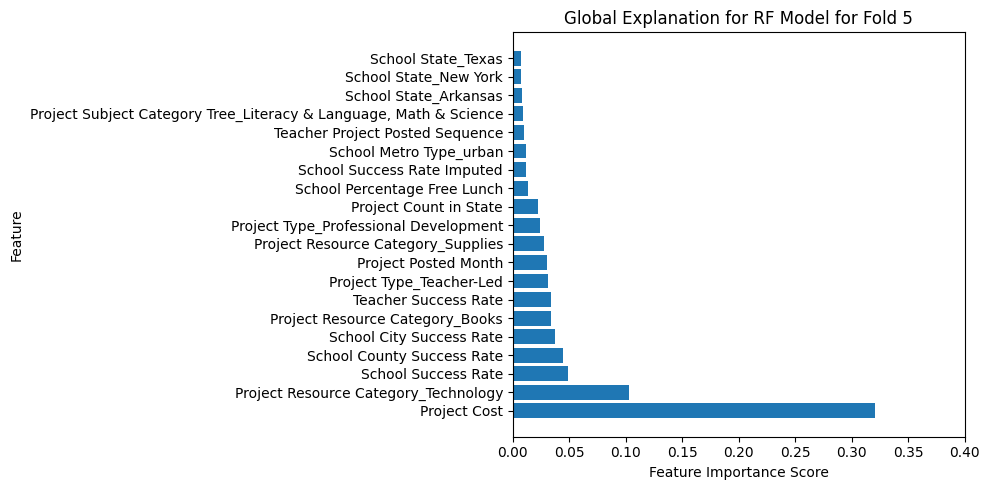

In [71]:
# Check the global explanation values - Test
fig = plt.figure(figsize=(10, 5))
plt.barh(global_explanation_feat["Feature"][:20], global_explanation_feat["Importance"][:20])
plt.xlim(0, 0.4)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title(f"Global Explanation for {save_name}")
plt.tight_layout()
save_image("rf_global_explanation_top_20", images_save_path)
plt.show()